In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
import seaborn as sns
import os
import gc
import altair as alt
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

### Data Import

In [68]:
train_id= pd.read_csv("train_identity.csv",index_col='TransactionID')
train_tran= pd.read_csv('train_transaction.csv',index_col='TransactionID')
#test_id = pd.read_csv("test_identity.csv",index_col='TransactionID')
#test_tran = pd.read_csv("test_transaction.csv",index_col='TransactionID')

In [69]:
train_tran.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.

TransactionDT: timedelta from a given reference datetime (not an actual timestamp) 

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features - Transaction

ProductCD

card1 - card6

addr1, addr2

P_emaildomain

R_emaildomain

M1 - M9

Categorical Features - Identity

DeviceType

DeviceInfo

id_12 - id_38


In [70]:
#test_tran.head(15) 

In [71]:
train_id.head(10)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [72]:
print("train_tran dataset shape",train_tran.shape)
print("train_id dataset shape",train_id.shape)
#print("test_tran dataset shape",test_tran.shape)
#print("test_id dataset shape",test_id.shape)

train_tran dataset shape (590540, 393)
train_id dataset shape (144233, 40)


In [73]:
tran_category_name = ['isFraud',
                      'ProductCD',
                      'card1','card2','card3','card4','card5','card6',
                      'addr1', 'addr2',
                      'P_emaildomain','R_emaildomain',
                      'M1','M2','M3','M4','M5','M6','M7','M8','M9']
    
id_category_name_train = ['DeviceType','DeviceInfo'] + ['id_'+str(x) for x in range(12,39)]
#id_category_name_test = ['DeviceType','DeviceInfo'] + ['id-'+str(x) for x in range(12,39)]

tran_col_name = list(train_tran.columns) 
               # ['V'+str(x) for x in range(1,340)]
id_col_name = list(train_id.columns) 

False    569877
True      20663
Name: isFraud, dtype: int64

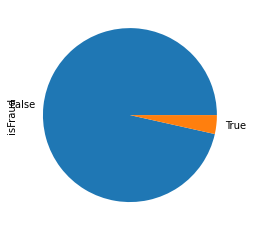

In [74]:
train_tran['isFraud'].astype(bool).value_counts().plot.pie()
train_tran['isFraud'].astype(bool).value_counts()

In [75]:
train_df = train_tran.merge(train_id, how='left', left_index=True, right_index=True)

In [76]:
train_df.head()
train_df.shape

(590540, 433)

#Variable Simplify Refer to Notebook V col simplification

In [77]:
v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]

#v += [96, 98, 99, 104] #relates to groups, no NAN 
v += [107, 108, 111, 115, 117, 120, 121, 123] # maybe group, no NAN
v += [124, 127, 129, 130, 136] # relates to groups, no NAN

# LOTS OF NAN BELOW
v += [138, 139, 142, 147, 156, 162] #b1
v += [165, 160, 166] #b1
v += [178, 176, 173, 182] #b2
v += [187, 203, 205, 207, 215] #b2
v += [169, 171, 175, 180, 185, 188, 198, 210, 209] #b2
v += [218, 223, 224, 226, 228, 229, 235] #b3
v += [240, 258, 257, 253, 252, 260, 261] #b3
v += [264, 266, 267, 274, 277] #b3
v += [220, 221, 234, 238, 250, 271] #b3

v += [294, 284, 285, 286, 291, 297] # relates to grous, no NAN
v += [303, 305, 307, 309, 310, 320] # relates to groups, no NAN
v += [281, 283, 289, 296, 301, 314]

# Data Exploration

In [78]:
train_df.isnull().sum()

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614
D10                76022


In [79]:
#train_df[cols_num].describe().transpose()

We notice there are many NaN data in the training dataset, we directly fill in NaN with -999 because in XGboost every NaN would be an root, so number -999 we could XXXXXXX

In [80]:
train_df.isnull().sum().sum()
#No more NaN value

115523073

In [81]:
train_df[tran_category_name+id_category_name_train] = train_df[tran_category_name+id_category_name_train].astype('category')

In [82]:
col_name_1 =['isFraud'] + ['TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9'] + ['V'+str(x) for x in v] 
col_name_1 += id_col_name
#col_name_1

In [83]:
X = train_df[col_name_1].drop(['isFraud'],axis = 1)

Y = train_df['isFraud']
X.shape


(590540, 213)

In [84]:
X.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V14,V17,V20,V23,V26,V27,V30,V36,V37,V40,V41,V44,V47,V48,V54,V56,V59,V62,V65,V67,V68,V70,V76,V78,V80,V82,V86,V88,V89,V91,V107,V108,V111,V115,V117,V120,V121,V123,V124,V127,V129,V130,V136,V138,V139,V142,V147,V156,V162,V165,V160,V166,V178,V176,V173,V182,V187,V203,V205,V207,V215,V169,V171,V175,V180,V185,V188,V198,V210,V209,V218,V223,V224,V226,V228,V229,V235,V240,V258,V257,V253,V252,V260,V261,V264,V266,V267,V274,V277,V220,V221,V234,V238,V250,V271,V294,V284,V285,V286,V291,V297,V303,V305,V307,V309,V310,V320,V281,V283,V289,V296,V301,V314,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,117.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,117.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,ya

In [85]:
#X.dtypes

In [86]:
cols = list(X.columns)
cols_category = tran_category_name+id_category_name_train
cols_category.remove('isFraud')
cols_category
cols_num = set(cols)- set(cols_category)

In [87]:
for i in cols_num:
    
    mean_value = X[i].mean()
    print(i,mean_value)
    X[i].fillna(mean_value,inplace = True)

V234 2.0928466368727725
V165 2239.912219119266
V78 1.1444624393668623
V284 0.08854279559986995
V229 1.638710419382044
V107 0.999579821966501
V220 0.1694716298014369
V6 1.0456863066380082
V235 0.18410641723529864
V210 14.391834928471646
V82 0.8446096342864438
V266 9.16783868355349
D7 41.63894955931855
C14 8.29521454939547
V120 1.0008742413922802
V182 0.8562425249407366
id_08 -38.6003879728419
V267 36.52510270804343
V65 0.999663059652075
C2 15.26973448030616
V301 0.05200154088696033
V178 6.64928275239739
V198 0.9619508078301232
V253 1.1621636126657977
V185 0.1739034036861943
C5 5.57152606089342
V111 1.002563424857597
V180 0.9241233308777776
V27 0.0007755599484515042
C8 5.144574457276391
V11 0.47898654792082324
V23 1.0347913471612369
V260 0.964425362263283
V281 0.08778304040076637
V4 0.8464560984151157
TransactionAmt 135.02717637293821
V76 0.5875570430176156
V138 0.036439074989322105
V203 1078.3275380768232
D10 123.98213667937759
C4 4.092185118704914
V271 9.445132757467785
V68 0.000533651

In [88]:
X.isnull().sum()

TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1                  0
dist2                  0
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D2                     0
D3                     0
D4                     0
D5                     0
D6                     0
D7                     0
D8                     0
D9                     0
D10                    0
D11                    0


In [91]:
X.isnull().sum().sum()

17803447

Outlier Removal / Relax / Smooth / PCA
Normally you want to remove anomalies from your data because they confuse your models. However in this competition, we want to find anomalies so use smoothing techniques carefully. The idea behind these methods is to determine and remove uncommon values. For example, by using frequency encoding of a variable, you can remove all values that appear less than 0.1% by replacing them with a new value like -9999 (note that you should use a different value than what you used for NAN).

# Local Validation

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 110)

In [20]:
# Categorical Features - Transaction
# ProductCD
# card1 - card6
# addr1, addr2
# P_emaildomain
# R_emaildomain
# M1 - M9

# Categorical Features - Identity
# DeviceType
# DeviceInfo
# id_12 - id_38


In [ ]:
#X_train.dtypes

### XGBOOST

In [ ]:
xgb_model = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist',
        enable_categorical=True
    )
h = xgb_model.fit(X_train, Y_train, 
    eval_set=[(X_train,Y_train)],
    verbose=50, early_stopping_rounds=100)

In [ ]:
result_xgb =xgb_model.predict(X_test)

In [ ]:
result_xgb_proba = xgb_model.predict_proba(X_test)[:,1]

In [ ]:
confusion_matrix_xgb = confusion_matrix(Y_test,result_xgb)
print(confusion_matrix_xgb)
print(classification_report(Y_test,result_xgb))

In [ ]:
mean = accuracy_score(Y_test,result_xgb)
print("Accuracy Score:",mean)
print("Precision:", metrics.precision_score(Y_test,result_xgb))
print("Recall:", metrics.recall_score(Y_test,result_xgb))
print("F1 Score:",f1_score(Y_test,result_xgb))
print("AUC Score:", roc_auc_score(Y_test,result_xgb_proba))

In [ ]:
type(result_xgb), type(Y_test)

In [ ]:
len(result_xgb),len(Y_test)

In [ ]:
XGboost_roc_auc = roc_auc_score(Y_test,result_xgb_proba)
auc = metrics.roc_auc_score(Y_test,result_xgb_proba)
fpr, tpr, thresholds = roc_curve(Y_test, result_xgb_proba)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(xgb_model.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('XGB95 Most Important Features')
plt.tight_layout()
plt.show()
del xgb_model, h ,confusion_matrix_xgb; x=gc.collect()

### Data Processing 2

Obviously  id_33 screen resolution ratio has nothing to do with the fraud rate
DeviceInfo 

In [92]:
X_2 = X.drop('id_33',axis = 1)
X_2 = X_2.drop('DeviceInfo', axis = 1)
Y_2 = Y

In [93]:
cols_category.remove('id_33')

In [94]:
cols_category.remove('DeviceInfo')

In [95]:
X_2.shape

(590540, 211)

we notice the sample data is imbalanced. we use SMOTE to make the dataset balanced

# Data Processing

In [96]:
# Label Encoding for categorical variables.
X_2[cols_category] = X_2[cols_category].astype('category')

from sklearn import preprocessing
for f in X_2[cols_category].columns:
    if X_2[f].dtype=='category': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_2[f].values))
        X_2[f] = lbl.transform(list(X_2[f].values))

In [97]:
X_2[cols_category] = X_2[cols_category].astype('category')

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.30, random_state = 110)

In [99]:
X_train.isnull().sum().sum()

0

In [100]:
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V14,V17,V20,V23,V26,V27,V30,V36,V37,V40,V41,V44,V47,V48,V54,V56,V59,V62,V65,V67,V68,V70,V76,V78,V80,V82,V86,V88,V89,V91,V107,V108,V111,V115,V117,V120,V121,V123,V124,V127,V129,V130,V136,V138,V139,V142,V147,V156,V162,V165,V160,V166,V178,V176,V173,V182,V187,V203,V205,V207,V215,V169,V171,V175,V180,V185,V188,V198,V210,V209,V218,V223,V224,V226,V228,V229,V235,V240,V258,V257,V253,V252,V260,V261,V264,V266,V267,V274,V277,V220,V221,V234,V238,V250,V271,V294,V284,V285,V286,V291,V297,V303,V305,V307,V309,V310,V320,V281,V283,V289,V296,V301,V314,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3478475,12835379,107.95,4,10948,413,42,4,108,1,17,62,118.50218,231.855423,9,32,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,5.0,1.0,112.0,112.000000,25.000000,112.000000,25.000000,69.805717,41.63895,146.058108,0.561057,112.0,146.621465,54.037533,17.901295,57.724444,112.0,2,2,2,3,2,1,2,2,2,0.999945,1.078075,0.846456,1.045686,1.027704,0.478987,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,107.949997,0.0,107.949997,0.0,0.036439,1.073915,0.048581,0.168601,0.777485,6.594661,2239.912219,47453.181173,359.469437,6.649283,1.376979,0.055231,0.856243,1.843752,1078.327538,18.060417,72.284098,133.208217,0.168053,1.690908,0.212639,0.924123,0.173903,1.014755,0.961951,14.391835,35.001872,1.725784,0.093153,0.394748,0.247612,1.351928,1.63871,0.184106,1.000997,1.34351,1.250993,1.162164,1.032048,0.964425,1.107161,201.657617,9.167839,36.525103,107.151636,51.956645,0.169472,1.274912,2.092847,0.127956,0.788588,9.445133,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,107.949997,0.0,107.949997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.69871,13.285354,-38.600388,0.091023,-0.301124,99.745325,2,54,25,3,2,104,18,522,394,490,25,3,12,341,95,2,2,2,74,103,4,4,2,2,2,2,2
3487299,13116781,85.00,4,2328,454,42,4,108,2,52,62,118.50218,231.855423,16,32,104.0,87.0,0.0,0.0,107.0,76.0,0.0,0.0,68.0,0.0,70.0,0.0,495.0,90.0,377.0,377.000000,12.000000,377.000000,12.000000,69.805717,41.63895,146.058108,0.561057,377.0,146.621465,54.037533,17.901295,57.724444,377.0,2,2,2,3,2,1,2,2,2,0.999945,1.078075,0.846456,1.045686,1.027704,0.478987,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,335.000000,0.0,335.000000,0.0,0.036439,1.073915,0.048581,0.168601,0.777485,6.594661,2239.912219,47453.181173,359.469437,6.649283,1.376979,0.055231,0.856243,1.843752,1078.327538,18.060417,72.284098,133.208217,0.168053,1.690908,0.212639,0.924123,0.173903,1.014755,0.961951,14.391835,35.001872,1.725784,0.093153,0.394748,0.247612,1.351928,1.63871,0.184106,1.000997,1.34351,1.250993,1.162164,1.032048,0.964425,1.107161,201.657617,9.167839,36.525103,107.151636,51.956645,0.169472,1.274912,2.092847,0.127956,0.788588,9.445133,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,335.000000,0.0,335.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.69871,13.285354,-38.600388,0.091023,-0.301124,99.745325,2,54,25,3,2,104,18,522,394,490,25,3,12,341,95,2,2,2,74,103,4,4,2,2,2,2,2
3021745,854797,57.95,4,13431,466,42,2,102,1,1

In [101]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
X_train,Y_train= ran.fit_resample(X_train,Y_train)
#sm = SMOTE(sampling_strategy =1,random_state=110,n_jobs= -1)
#X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
X_train.isnull().sum().sum()

In [ ]:
Y_train.astype(bool).value_counts().plot.pie()
Y_train.astype(bool).value_counts()

### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rfy = rf_model.predict(X_test)


In [109]:
rfy_proba = rf_model.predict_proba(X_test)[:,1]

In [110]:
confusion_matrix_rf = confusion_matrix(Y_test,rfy)
print(confusion_matrix_rf)
print(classification_report(Y_test,rfy))

[[170735    214]
 [  2864   3349]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170949
           1       0.94      0.54      0.69      6213

    accuracy                           0.98    177162
   macro avg       0.96      0.77      0.84    177162
weighted avg       0.98      0.98      0.98    177162



In [111]:
mean = accuracy_score(Y_test,rfy)
print("Accuracy Score:",mean)
print("Precision:", metrics.precision_score(Y_test, rfy))
print("Recall:", metrics.recall_score(Y_test,rfy))
print("F1 Score:",f1_score(Y_test, rfy))
print("AUC Score:", roc_auc_score(Y_test,rfy_proba))

Accuracy Score: 0.982626071053612
Precision: 0.939938254280101
Recall: 0.5390310638982778
F1 Score: 0.6851472995090016
AUC Score: 0.9453764675874384


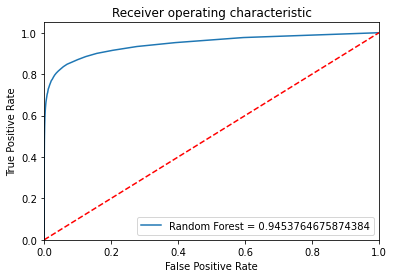

In [112]:
randomforest_roc_auc = roc_auc_score(Y_test,rfy_proba)
auc = metrics.roc_auc_score(Y_test, rfy_proba)
fpr, tpr, thresholds = roc_curve(Y_test, rfy_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

### Logistic Regression

In [102]:
import statsmodels.api as sm
logit=sm.Logit(Y_train,X_train)
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.463107
         Iterations 15
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.332      
Dependent Variable: isFraud          AIC:              739406.8807
Date:               2022-03-21 17:43 BIC:              741852.3039
No. Observations:   797856           Log-Likelihood:   -3.6949e+05
Df Model:           210              LL-Null:          -5.5303e+05
Df Residuals:       797645           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     15.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
TransactionDT    0.0000   0.0000   51.6980 0.0000   0.0000  0.0000
TransactionAmt   0.0009   0.0000   63.5748 0.0000   

In [103]:
odds_ratio=np.exp(result.params)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(odds_ratio)

TransactionDT     1.000000e+00
TransactionAmt    1.000854e+00
ProductCD         8.757647e-01
card1             9.999898e-01
card2             1.000001e+00
card3             1.022166e+00
card4             1.066475e+00
card5             1.001596e+00
card6             4.843615e-01
addr1             1.000501e+00
addr2             9.970914e-01
dist1             1.000052e+00
dist2             1.000033e+00
P_emaildomain     1.002686e+00
R_emaildomain     1.002662e+00
C1                9.906544e-01
C2                1.000170e+00
C3                7.369326e-02
C4                1.018881e+00
C5                1.012810e+00
C6                9.809301e-01
C7                9.955840e-01
C8                1.029241e+00
C9                1.053929e+00
C10               9.982691e-01
C11               1.074082e+00
C12               9.648128e-01
C13               1.002039e+00
C14               8.965750e-01
D1                1.000710e+00
D2                9.979990e-01
D3                9.947229e-01
D4      

In [104]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
logy = lr_model.predict(X_test)
confusion_matrix_log= confusion_matrix(Y_test,logy)
print(confusion_matrix_log)
print(classification_report(Y_test,logy))

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[131499  39450]
 [  2912   3301]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86    170949
           1       0.08      0.53      0.13      6213

    accuracy                           0.76    177162
   macro avg       0.53      0.65      0.50    177162
weighted avg       0.95      0.76      0.84    177162



In [105]:
from sklearn.metrics import f1_score
print("Accuracy Score:",accuracy_score(Y_test, logy))
print("Precision:", metrics.precision_score(Y_test, logy))
print("Recall:", metrics.recall_score(Y_test, logy))
print("F1 Score:",f1_score(Y_test, logy))
print("AUC Score:", roc_auc_score(Y_test,lr_model.predict_proba(X_test)[:,1]))

Accuracy Score: 0.760885517210237
Precision: 0.07721456808027882
Recall: 0.531305327539031
F1 Score: 0.13483375541213954
AUC Score: 0.7047906380753735


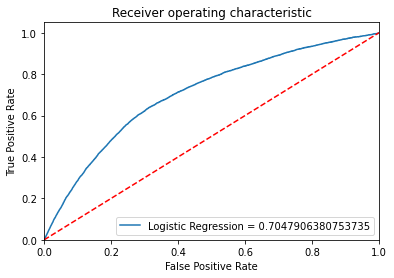

In [106]:
logit_roc_auc = roc_auc_score(Y_test,lr_model.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(Y_test, lr_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [107]:
lr_model.predict_proba(X_test)[:,1]

array([0.36309586, 0.61155381, 0.42105526, ..., 0.52618541, 0.38871674,
       0.58514565])